In [20]:
#Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

#import requests library
import requests

#import API key
from config import weather_api_key



In [2]:
#Create a set of random lat/lon combinations
lats=np.random.uniform(-90,90,1500)
lngs=np.random.uniform(-180,180,1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
#add  lat and lng to a list
coordinates=list(lat_lngs)

In [4]:
#Create a list for cities
cities=[]

#Identify nearest city for each lat/lng combination
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #If city is unique, add to city list
    if city not in cities:
        cities.append(city)

#print city count        
len(cities)

603

In [5]:
#starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
#create empty list for weather data
city_data=[]

#Print beginning of logging
print("Beginning Data Retrieval.    ")
print("-----------------------------")

#create counters
record_count=1
set_count=1



Beginning Data Retrieval.    
-----------------------------


In [7]:
# Loop through all cities
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging
    if (i % 50 ==0 and i >=50):
        set_count +=1
        record_count=1
        time.sleep(60)
        
    #create endpoint url with each city
    city_url=url+"&q="+city.replace(" ","+")
    
    #Log the URL, record and set numbers and city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to record count
    record_count+=1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | okhotsk
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | san jeronimo
Processing Record 15 of Set 1 | morehead
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | troitsko-pechorsk
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | bethel
Processing 

Processing Record 39 of Set 4 | bay roberts
Processing Record 40 of Set 4 | rjukan
Processing Record 41 of Set 4 | jatai
Processing Record 42 of Set 4 | san carlos de bariloche
Processing Record 43 of Set 4 | san cristobal
Processing Record 44 of Set 4 | namibe
Processing Record 45 of Set 4 | gardner
Processing Record 46 of Set 4 | ballina
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | obukhiv
Processing Record 49 of Set 4 | nuoro
Processing Record 50 of Set 4 | portland
Processing Record 1 of Set 5 | katsuura
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | zhovtneve
Processing Record 5 of Set 5 | sao filipe
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | djibo
Processing Record 8 of Set 5 | luderitz
Processing Record 9 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | tsihombe
City not found. Skipping...
Proces

Processing Record 30 of Set 8 | zorritos
Processing Record 31 of Set 8 | gwadar
Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | salair
Processing Record 34 of Set 8 | half moon bay
Processing Record 35 of Set 8 | dembi dolo
Processing Record 36 of Set 8 | port-cartier
Processing Record 37 of Set 8 | orebro
Processing Record 38 of Set 8 | amapa
Processing Record 39 of Set 8 | nemuro
Processing Record 40 of Set 8 | paradwip
City not found. Skipping...
Processing Record 41 of Set 8 | mpanda
Processing Record 42 of Set 8 | campos altos
Processing Record 43 of Set 8 | yinchuan
Processing Record 44 of Set 8 | olive branch
Processing Record 45 of Set 8 | sembe
Processing Record 46 of Set 8 | ayan
Processing Record 47 of Set 8 | arinos
Processing Record 48 of Set 8 | poyarkovo
Processing Record 49 of Set 8 | tazovskiy
Processing Record 50 of Set 8 | kangaatsiaq
Processing Record 1 of Set 9 | antalaha
Processing Record 2 of Set 9 | soyo
Processing Record 3 of Set 9 | awbar

Processing Record 17 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 18 of Set 12 | sabang
Processing Record 19 of Set 12 | salta
Processing Record 20 of Set 12 | benjamin hill
Processing Record 21 of Set 12 | port lincoln
Processing Record 22 of Set 12 | new braunfels
Processing Record 23 of Set 12 | luwuk
Processing Record 24 of Set 12 | airai
Processing Record 25 of Set 12 | redwater
Processing Record 26 of Set 12 | hobyo
Processing Record 27 of Set 12 | acapulco
Processing Record 28 of Set 12 | batemans bay
Processing Record 29 of Set 12 | el oro
Processing Record 30 of Set 12 | abu kamal
Processing Record 31 of Set 12 | sakete
Processing Record 32 of Set 12 | magdalena
Processing Record 33 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 34 of Set 12 | goderich
Processing Record 35 of Set 12 | lapua
Processing Record 36 of Set 12 | alice springs
Processing Record 37 of Set 12 | tautira
Processing Record 38 of Set 12 | nieuw amsterdam
Processin

In [8]:
#convert array into df
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,51.91,62,75,5.75,CL,2021-12-01 02:32:14
1,Hermanus,-34.4187,19.2345,58.89,84,11,8.63,ZA,2021-12-01 02:27:22
2,Lavrentiya,65.5833,-171.0000,-13.99,88,3,8.61,RU,2021-12-01 02:32:15
3,Rikitea,-23.1203,-134.9692,76.24,77,0,20.62,PF,2021-12-01 02:32:15
4,Butaritari,3.0707,172.7902,82.11,76,90,8.14,KI,2021-12-01 02:27:20
5,Bredasdorp,-34.5322,20.0403,56.28,83,82,5.26,ZA,2021-12-01 02:32:16
6,Pevek,69.7008,170.3133,-12.14,99,100,1.23,RU,2021-12-01 02:29:42
7,Vaini,-21.2000,-175.2000,82.56,83,40,10.36,TO,2021-12-01 02:32:16
8,Okhotsk,59.3833,143.3000,-13.09,85,15,14.76,RU,2021-12-01 02:32:17
9,San Jeronimo,-11.9472,-75.2829,52.41,86,100,1.34,PE,2021-12-01 02:32:17


In [9]:
city_data_df=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-12-01 02:32:14,-53.1500,-70.9167,51.91,62,75,5.75
1,Hermanus,ZA,2021-12-01 02:27:22,-34.4187,19.2345,58.89,84,11,8.63
2,Lavrentiya,RU,2021-12-01 02:32:15,65.5833,-171.0000,-13.99,88,3,8.61
3,Rikitea,PF,2021-12-01 02:32:15,-23.1203,-134.9692,76.24,77,0,20.62
4,Butaritari,KI,2021-12-01 02:27:20,3.0707,172.7902,82.11,76,90,8.14
5,Bredasdorp,ZA,2021-12-01 02:32:16,-34.5322,20.0403,56.28,83,82,5.26
6,Pevek,RU,2021-12-01 02:29:42,69.7008,170.3133,-12.14,99,100,1.23
7,Vaini,TO,2021-12-01 02:32:16,-21.2000,-175.2000,82.56,83,40,10.36
8,Okhotsk,RU,2021-12-01 02:32:17,59.3833,143.3000,-13.09,85,15,14.76
9,San Jeronimo,PE,2021-12-01 02:32:17,-11.9472,-75.2829,52.41,86,100,1.34


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

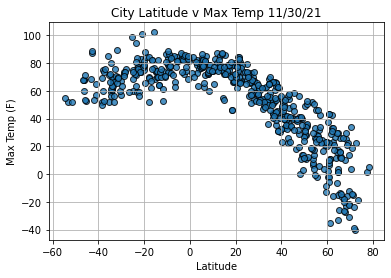

In [12]:
#Build scatter plot
plt.scatter(lats,max_temps,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Max Temp "+time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_MaxTemp.png")

#Show plot
plt.show()

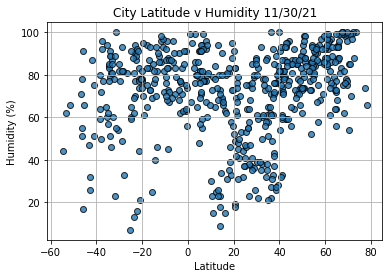

In [13]:
#Build scatter plot for humidity
plt.scatter(lats,humidity,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Humidity.png")

#Show plot
plt.show()

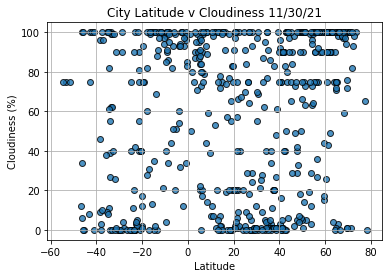

In [14]:
#Build scatter plot for Cloudiness
plt.scatter(lats,cloudiness,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Cloudiness.png")

#Show plot
plt.show()

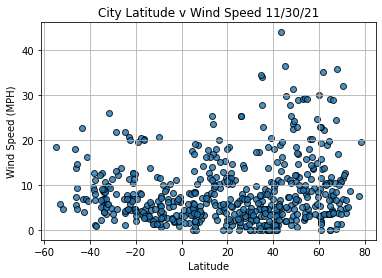

In [23]:
#Build scatter plot for Wind Speed
plt.scatter(lats,wind_speed,
           edgecolors="black", linewidths=1,
           marker="o", alpha=.8,label="Cities")

#other graph properties
plt.title(f"City Latitude v Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid()

#save fig
plt.savefig("Weather_Data/Latitude_v_Wind Speed.png")

#Show plot
plt.show()

In [42]:
#import lingregress
from scipy.stats import linregress

#create function to perform linear regression on weather data
#and plot a regression line and the equation data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calc regression line values
    regression_values=x_values*slope+intercept
    
    #Get Equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel("Latitude")
    plt.show()

In [43]:
#create Northern hemisphere df
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

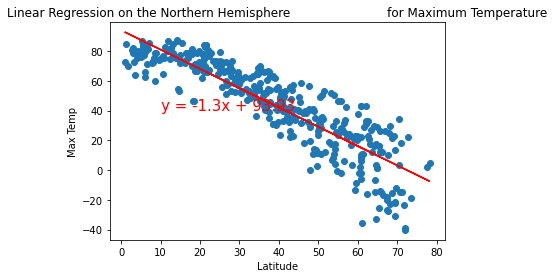

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

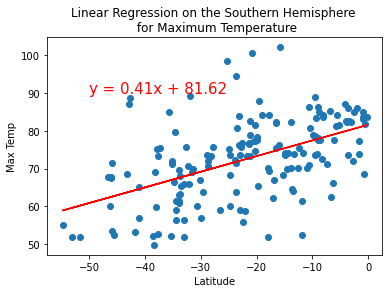

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp",(-50,90))

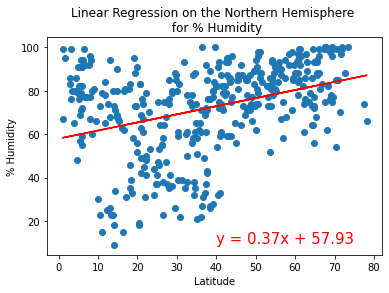

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

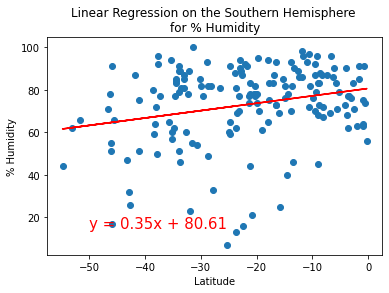

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

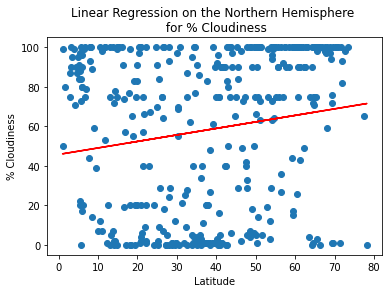

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

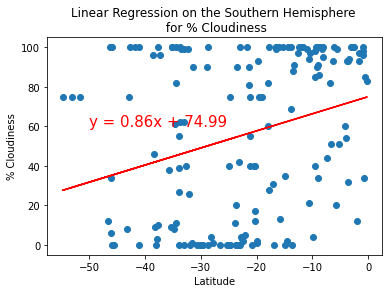

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

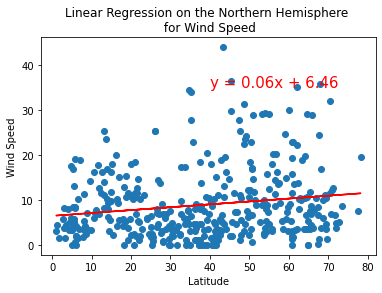

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

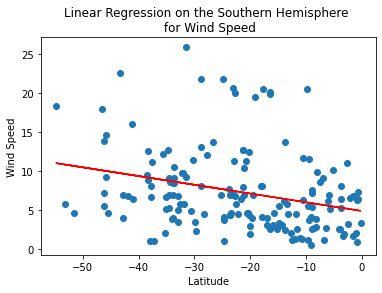

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))